In [234]:
printmd('Mercedes-Benz Regression Project') 
printmd('Includes Principal Component Analysis,') 
printmd('4 Machine Learning Models - XGBoost with cross validation,  Ridge,  Lasso,  Elasticnet')
printmd('and 1 Deep Neural Network Regression Model.') 
printmd(' ')
printmd('Neural Network Model has 11 Layers (3 Fully Connected) and 415,169 Parameters. Batch Normalization, \
Dropout Layers and Regularization included')
printmd('  ')
printmd('Data is heavily binary in nature; 16 variables with zero variance, 340 out of 368 features binary \
and the remaining features too do not have much variation; as a result of this none of the models performed well.') 
printmd('Ridge and Deep Neural Network Models got the maximum R squared values of around .66')

## <span style="color:red">Mercedes-Benz Regression Project</span>

## <span style="color:red">Includes Principal Component Analysis,</span>

## <span style="color:red">4 Machine Learning Models - XGBoost with cross validation,  Ridge,  Lasso,  Elasticnet</span>

## <span style="color:red">and 1 Deep Neural Network Regression Model.</span>

## <span style="color:red"> </span>

## <span style="color:red">Neural Network Model has 11 Layers (3 Fully Connected) and 415,169 Parameters. Batch Normalization, Dropout Layers and Regularization included</span>

## <span style="color:red">  </span>

## <span style="color:red">Data is heavily binary in nature; 16 variables with zero variance, 340 out of 368 features binary and the remaining features too do not have much variation; as a result of this none of the models performed well.</span>

## <span style="color:red">Ridge and Deep Neural Network Models got the maximum R squared values of around .66</span>

In [1]:
################################################################################################################################
# import the pandas package for reading the train and test datasets
################################################################################################################################
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid', palette='muted', font_scale=1.0)

import warnings
warnings.filterwarnings('ignore')



from IPython.display import Markdown, display
def printmd(string):
    display(Markdown('## <span style="color:red">'+string+'</span>'))

In [2]:
################################################################################################################################
# read the input train dataset
################################################################################################################################

MBdata = pd.read_csv('./datasets/MBtrain.csv')


In [3]:
################################################################################################################################
# check how many rows, columns and other details are there in the train dataset 
################################################################################################################################

MBdata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [4]:
################################################################################################################################
# check the statistics of the train dataset
################################################################################################################################

MBdata.describe()


ID            y          X10     X11          X12  \
count  4209.000000  4209.000000  4209.000000  4209.0  4209.000000   
mean   4205.960798   100.669318     0.013305     0.0     0.075077   
std    2437.608688    12.679381     0.114590     0.0     0.263547   
min       0.000000    72.110000     0.000000     0.0     0.000000   
25%    2095.000000    90.820000     0.000000     0.0     0.000000   
50%    4220.000000    99.150000     0.000000     0.0     0.000000   
75%    6314.000000   109.010000     0.000000     0.0     0.000000   
max    8417.000000   265.320000     1.000000     0.0     1.000000   

               X13          X14          X15          X16          X17  ...  \
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000  ...   
mean      0.057971     0.428130     0.000475     0.002613     0.007603  ...   
std       0.233716     0.494867     0.021796     0.051061     0.086872  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
50%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%       0.000000     1.000000     0.000000     0.000000     0.000000  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

              X375         X376         X377         X378         X379  \
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000   
mean      0.318841     0.057258     0.314802     0.020670     0.009503   
std       0.466082     0.232363     0.464492     0.142294     0.097033   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     0.000000     1.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

              X380         X382         X383         X384         X385  
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000  
mean      0.008078     0.007603     0.001663     0.000475     0.001426  
std       0.089524     0.086872     0.040752     0.021796     0.037734  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 370 columns]

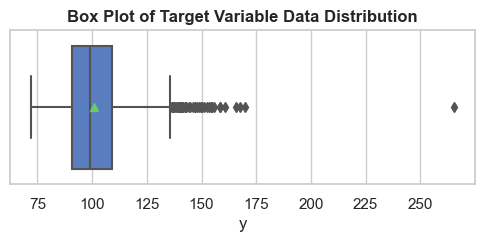

In [5]:
################################################################################################################################
# boxplot to identify the outliers on the target variable from the train dataset
# we will check outliers only in target variable as other variables are either
# categorical or having binary data
################################################################################################################################

plt.figure(figsize=(6,2))
plt.title('Box Plot of Target Variable Data Distribution',fontweight='bold')
sns.boxplot(MBdata['y'],orient='h',showmeans=True)
plt.show()


In [6]:
################################################################################################################################
# check number of observations before removing the outliers from the train datset 
################################################################################################################################

MBdata['y'].count()


4209

In [7]:
################################################################################################################################
# eliminating the outliers from the input train datset and count again
################################################################################################################################

MBdata = MBdata[MBdata['y'] < 130]

MBdata['y'].count()

4127

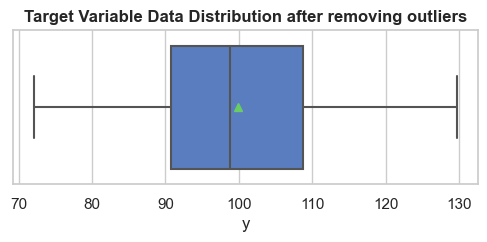

In [8]:
################################################################################################################################
# boxplot after removing the outliers from the target variable
################################################################################################################################
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
plt.figure(figsize=(6,2))
sns.boxplot(MBdata['y'],orient='h',showmeans=True)
plt.title('Target Variable Data Distribution after removing outliers',fontweight='bold')
plt.show()

In [9]:
################################################################################################################################
# variables with 0 variance for deletion from the train dataset
################################################################################################################################

for i in MBdata.columns:
     if MBdata[i].dtype !=  object :
        if (MBdata[i].var()==0):
            print('column ', i.center(10) ,' variance-in-train-datset: ', MBdata[i].var())


column     X11      variance-in-train-datset:  0.0
column     X93      variance-in-train-datset:  0.0
column     X107     variance-in-train-datset:  0.0
column     X204     variance-in-train-datset:  0.0
column     X205     variance-in-train-datset:  0.0
column     X233     variance-in-train-datset:  0.0
column     X235     variance-in-train-datset:  0.0
column     X236     variance-in-train-datset:  0.0
column     X268     variance-in-train-datset:  0.0
column     X289     variance-in-train-datset:  0.0
column     X290     variance-in-train-datset:  0.0
column     X293     variance-in-train-datset:  0.0
column     X297     variance-in-train-datset:  0.0
column     X330     variance-in-train-datset:  0.0
column     X339     variance-in-train-datset:  0.0
column     X347     variance-in-train-datset:  0.0


In [10]:
################################################################################################################################
# drop the variables with 0 variance from the train dataset
################################################################################################################################

MBdata = MBdata.drop(['X11','X93','X107','X204','X205','X233','X235','X236','X268',
                      'X289','X290','X293','X297','X330','X339','X347'],axis=1)


In [11]:
################################################################################################################################
# check for null values in train dataset
################################################################################################################################

for i in MBdata.columns:
    if (MBdata[i].isna().sum() != 0):
        print('column ', i ,' null-values-in-train-dataset: ', MBdata[i].isna().sum())
        

In [12]:
################################################################################################################################
# variables with 1 unique or 0 varaiance values in train dataset
################################################################################################################################

for i in MBdata.columns: 
    if (MBdata[i].nunique()== 1):
        print('column ', i ,' unique-values-in-train-dataset: ', MBdata[i].nunique())
 

In [13]:
################################################################################################################################
# variables with more than 2 unique values in train dataset
################################################################################################################################

for i in MBdata.columns: 
    if (MBdata[i].nunique() > 2):
          print('column ', i.center(10) ,' unique-values-in-train-dataset: ', MBdata[i].nunique())
 

column      ID      unique-values-in-train-dataset:  4127
column      y       unique-values-in-train-dataset:  2464
column      X0      unique-values-in-train-dataset:  46
column      X1      unique-values-in-train-dataset:  27
column      X2      unique-values-in-train-dataset:  42
column      X3      unique-values-in-train-dataset:  7
column      X4      unique-values-in-train-dataset:  3
column      X5      unique-values-in-train-dataset:  28
column      X6      unique-values-in-train-dataset:  12
column      X8      unique-values-in-train-dataset:  25


In [14]:
################################################################################################################################
# select object type columns for label encoding from train dataset
################################################################################################################################

for i in MBdata.columns:
     if MBdata[i].dtype ==  object :
        print('column ', i ,' object-datatype-in-train-dataset: ', MBdata[i].dtype)
        

column  X0  object-datatype-in-train-dataset:  object
column  X1  object-datatype-in-train-dataset:  object
column  X2  object-datatype-in-train-dataset:  object
column  X3  object-datatype-in-train-dataset:  object
column  X4  object-datatype-in-train-dataset:  object
column  X5  object-datatype-in-train-dataset:  object
column  X6  object-datatype-in-train-dataset:  object
column  X8  object-datatype-in-train-dataset:  object


In [15]:
################################################################################################################################
# we need to remove the ID column from train dataset as it is not 
# relevant. Apart from that, the target Y column
# from train dataset has to be seperated and stored in another variable.
# create x nd y variables by dropping variables as required, and print the 
# dimensions one more time
################################################################################################################################

MBdata_x = MBdata.drop(['ID','y'],axis=1)
MBdata_y = MBdata['y']


print(MBdata_x.shape)
print(MBdata_y.shape)


(4127, 360)
(4127,)


In [16]:
################################################################################################################################
#  split the train dataset into train and test x, y varaibales in 80/20 ratio 
################################################################################################################################

from sklearn.model_selection import train_test_split
MBxtrain,MBxtest,MBytrain,MBytest=train_test_split(MBdata_x, MBdata_y,test_size=0.2)


In [17]:
################################################################################################################################
# separate categorical and numerical variables from train dataset  
################################################################################################################################

MBxtrainNum = MBxtrain.drop(['X0','X1','X2','X3','X4','X5','X6','X8'],axis=1)
MBxtrainCat = MBxtrain[['X0','X1','X2','X3','X4','X5','X6','X8']]


In [18]:
################################################################################################################################
# check the dimensions of the split numerical and categorical train datset fields
################################################################################################################################

MBxtrainNum.shape,  MBxtrainCat.shape


((3301, 352), (3301, 8))

In [19]:
################################################################################################################################
# capture and store unique values of categorical train datset fields to be used 
# while label encoding the test datasets
################################################################################################################################

X0_UNIQUE = MBxtrainCat['X0'].unique()
X1_UNIQUE = MBxtrainCat['X1'].unique()
X2_UNIQUE = MBxtrainCat['X2'].unique()
X3_UNIQUE = MBxtrainCat['X3'].unique()
X4_UNIQUE = MBxtrainCat['X4'].unique()
X5_UNIQUE = MBxtrainCat['X5'].unique()
X6_UNIQUE = MBxtrainCat['X6'].unique()
X8_UNIQUE = MBxtrainCat['X8'].unique()


In [20]:
################################################################################################################################
# import label encoding package and initialize the labelencoder as many as fieds
################################################################################################################################

from sklearn.preprocessing import LabelEncoder

X0le = LabelEncoder()
X1le = LabelEncoder()
X2le = LabelEncoder()
X3le = LabelEncoder()
X4le = LabelEncoder()
X5le = LabelEncoder()
X6le = LabelEncoder()
X8le = LabelEncoder()


In [21]:
################################################################################################################################
# Label encoding  categorical fields from train dataset fit and transform both
################################################################################################################################

MBxtrainCat.X0 =  X0le.fit_transform(MBxtrainCat.X0)
MBxtrainCat.X1 =  X1le.fit_transform(MBxtrainCat.X1)
MBxtrainCat.X2 =  X2le.fit_transform(MBxtrainCat.X2)
MBxtrainCat.X3 =  X3le.fit_transform(MBxtrainCat.X3)
MBxtrainCat.X4 =  X4le.fit_transform(MBxtrainCat.X4)
MBxtrainCat.X5 =  X5le.fit_transform(MBxtrainCat.X5)
MBxtrainCat.X6 =  X6le.fit_transform(MBxtrainCat.X6)
MBxtrainCat.X8 =  X8le.fit_transform(MBxtrainCat.X8)


In [22]:
################################################################################################################################
# scale the numerical fields from the train dataset using standared scaler
# feature_range=(0, 1)
################################################################################################################################

from sklearn.preprocessing import StandardScaler , MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

scaler.fit(MBxtrainNum)
MBxtrainNum_scaled_data = scaler.transform(MBxtrainNum)


In [23]:
################################################################################################################################
# now run the PCA with 100 components on the train data numerical fields -           
# dimentionality reduction
################################################################################################################################

from sklearn.decomposition import PCA
pca = PCA(n_components=127)
pca.fit(MBxtrainNum_scaled_data)
MBxtrainNum_pca = pca.transform(MBxtrainNum_scaled_data)


In [24]:
################################################################################################################################
# reduced from 368 columns to 100 components
################################################################################################################################

MBxtrainNum_pca.shape


(3301, 127)

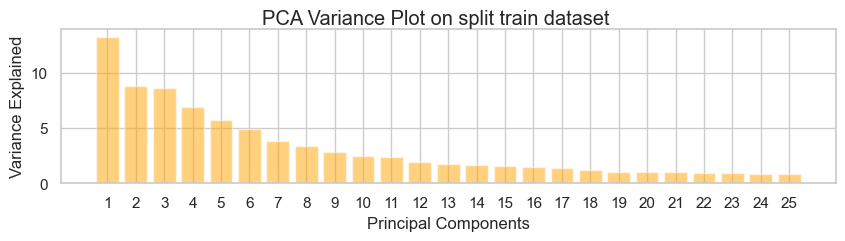

In [25]:
################################################################################################################################
# plot the Principal component variance on the train datset numerical fields
################################################################################################################################

import numpy as np
plt.figure(figsize=(10,2))
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['1', '2', '3', '4','5','6','7','8','9','10',
           '11', '12', '13', '14','15','16','17','18','19','20',
           '21', '22', '23', '24','25']
plt.bar(x= range(1,26), height=percent_variance[0:25], 
        alpha=.5,tick_label=columns,color='orange')
plt.ylabel('Variance Explained')
plt.xlabel('Principal Components')
plt.suptitle('PCA Variance Plot on split train dataset')
plt.show()


In [26]:
################################################################################################################################
# separate categorical and numerical variables from split test dataset  
################################################################################################################################

MBxtestNum = MBxtest.drop(['X0','X1','X2','X3','X4','X5','X6','X8'],axis=1)
MBxtestCat = MBxtest[['X0','X1','X2','X3','X4','X5','X6','X8']]


In [27]:
################################################################################################################################
# check the dimensions of the test datset numerical and categorical fields
################################################################################################################################

MBxtestNum.shape,  MBxtestCat.shape


((826, 352), (826, 8))

In [28]:
################################################################################################################################
# prepare data for Label encoding by populating new labels with one of the exisiting
# labels
################################################################################################################################

i = 0
while i < MBxtestCat.shape[0]:
    
    if MBxtestCat.X0.iat[i] not in X0_UNIQUE:
        MBxtestCat.X0.iat[i] = X0_UNIQUE[0]
    
    if MBxtestCat.X1.iat[i] not in X1_UNIQUE:
        MBxtestCat.X1.iat[i] = X1_UNIQUE[0]
    
    if MBxtestCat.X2.iat[i] not in X2_UNIQUE:
        MBxtestCat.X2.iat[i] = X2_UNIQUE[0]
    
    if MBxtestCat.X3.iat[i] not in X3_UNIQUE:
        MBxtestCat.X3.iat[i] = X3_UNIQUE[0]
    
    if MBxtestCat.X4.iat[i] not in X4_UNIQUE:
        MBxtestCat.X4.iat[i] = X4_UNIQUE[0]
    
    if MBxtestCat.X5.iat[i] not in X5_UNIQUE:
        MBxtestCat.X5.iat[i] = X5_UNIQUE[0]
    
    if MBxtestCat.X6.iat[i] not in X6_UNIQUE:
        MBxtestCat.X6.iat[i] = X6_UNIQUE[0]
    
    if MBxtestCat.X8.iat[i] not in X8_UNIQUE:
        MBxtestCat.X8.iat[i] = X8_UNIQUE[0]
    
    i = i+1
             

In [29]:
################################################################################################################################
# Label encoding for split test dataset categorical fields (tranform only, no fit)
################################################################################################################################

MBxtestCat.X0 =  X0le.transform(MBxtestCat.X0)
MBxtestCat.X1 =  X1le.transform(MBxtestCat.X1)
MBxtestCat.X2 =  X2le.transform(MBxtestCat.X2)
MBxtestCat.X3 =  X3le.transform(MBxtestCat.X3)
MBxtestCat.X4 =  X4le.transform(MBxtestCat.X4)
MBxtestCat.X5 =  X5le.transform(MBxtestCat.X5)
MBxtestCat.X6 =  X6le.transform(MBxtestCat.X6)
MBxtestCat.X8 =  X8le.transform(MBxtestCat.X8)


In [30]:
################################################################################################################################
# scale the numerical test dataset fields using standared scaler (tranform only)
################################################################################################################################

MBxtestNum_scaled_data = scaler.transform(MBxtestNum)


In [31]:
################################################################################################################################
# now run the PCA with 100 components on the test data numerical fields only - 
# (tranform only) dimentionality reduction
################################################################################################################################

MBxtestNum_pca = pca.transform(MBxtestNum_scaled_data)

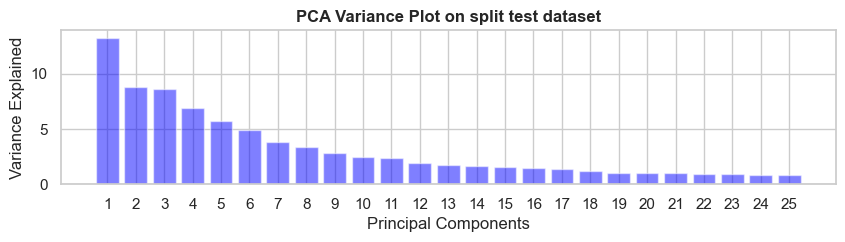

In [32]:
################################################################################################################################
# plot the Principal component variance on the test datset
################################################################################################################################

plt.figure(figsize=(10,2))
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['1', '2', '3', '4','5','6','7','8','9','10',
           '11', '12', '13', '14','15','16','17','18','19','20',
           '21', '22', '23', '24','25']
plt.bar(x= range(1,26), height=percent_variance[0:25],
        alpha=.5, tick_label=columns,color='blue')
plt.ylabel('Variance Explained')
plt.xlabel('Principal Components')
plt.title('PCA Variance Plot on split test dataset',fontweight='bold')
plt.show()

In [33]:
################################################################################################################################
# Concatenate the categorical and numerical parts of train and test datsest 
################################################################################################################################

MBxtrainFull = np.concatenate((MBxtrainCat,MBxtrainNum_pca),axis=1)
MBxtestFull  = np.concatenate((MBxtestCat,MBxtestNum_pca),axis=1)


In [34]:
################################################################################################################################
# check the dimenshions after Concatenating categorical and numerical parts of 
# train and test datsests 
################################################################################################################################

MBxtrainFull.shape, MBxtestFull.shape, MBxtrainCat.shape , MBxtrainNum_pca.shape


((3301, 135), (826, 135), (3301, 8), (3301, 127))

In [35]:
################################################################################################################################
#  import the modules for XGBoost Regressor
################################################################################################################################

from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor, plot_importance, callback


In [36]:
################################################################################################################################
# instantiate the xgboost regressor
################################################################################################################################

XGBR = XGBRegressor()


In [37]:
#XGBR.save_model('XBGR_MODEL')
#XGBR.load_model('XBGR_MODEL')

In [38]:
################################################################################################################################
# set the parameters for xgboost regressor as required
################################################################################################################################

XGBR.reg_alpha=0.4
XGBR.reg_lambda =0.6
XGBR.objective='reg:squarederror'
XGBR.verbosity = 1


In [39]:
################################################################################################################################
# fit the XGBoost model using train x and y variables 
################################################################################################################################

XGBmodel = XGBR.fit(MBxtrainFull,MBytrain)


<Figure size 400x200 with 0 Axes>

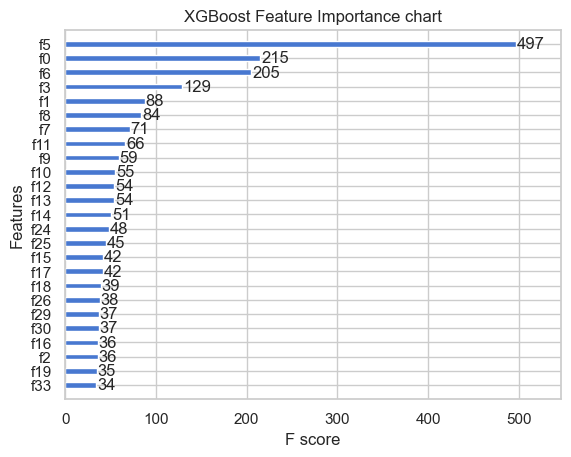

In [40]:
################################################################################################################################
#  plot the feature importance chart from XGBRegressor
################################################################################################################################

plt.figure(figsize=(4,2))
plot_importance(XGBR, max_num_features=25,show_values=True,height=.4,
                title='XGBoost Feature Importance chart',importance_type='weight')
plt.show()


In [41]:
################################################################################################################################
# print the Rsquared accuracy score while training 
################################################################################################################################

score = XGBR.score(MBxtrainFull,MBytrain)  
print("XGBoost Training score: %.2f" % score)


XGBoost Training score: 0.95


In [42]:
################################################################################################################################
# check the sahpes of train and test files finally once
################################################################################################################################
MBxtrainFull.shape, MBxtestFull.shape

((3301, 135), (826, 135))

In [43]:
################################################################################################################################
# pridict on the split test dataset to calculate different error values
################################################################################################################################

MBy_Pred = XGBR.predict(MBxtestFull)


In [44]:
################################################################################################################################
# pysically compare the true and predicted first 10 values
################################################################################################################################

a=pd.DataFrame({'Actual values ': MBytest, 'Predicted values ': MBy_Pred}) 
a.head(10)

Actual values   Predicted values 
2788          100.02         101.100113
3420           89.34          96.002151
3188           89.03          92.999458
1449           94.26          96.845459
2820           99.40          99.222382
1544          111.42         105.579933
279           104.56         111.646118
3354           90.60         108.263901
229            97.42         109.736046
2019           92.60          89.796822

In [45]:
################################################################################################################################
# calculate the mean squared and root mean squared error values
################################################################################################################################

mse = mean_squared_error(MBytest, MBy_Pred)
print("XGBoost MSE : %.2f" % mse)
print("XGBoost RMSE: %.2f" % (np.sqrt(mse)))


XGBoost MSE : 54.71
XGBoost RMSE: 7.40


In [46]:
################################################################################################################################
# calcualate the r squared values for split test dataset
################################################################################################################################

R_squared = r2_score(MBytest, MBy_Pred)
print("XGBoost R-Squared: ", np.round(R_squared, 2))


XGBoost R-Squared:  0.53


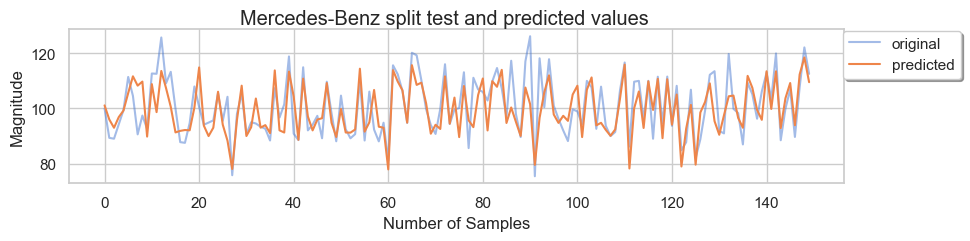

In [47]:
################################################################################################################################
# plot the graph of true and predicted values
################################################################################################################################

plt.figure(figsize=(10,2))
ax = range(len(MBytest[:150]))
plt.plot(ax, MBytest[:150], label="original",alpha=.5)
plt.plot(ax, MBy_Pred[:150], label="predicted")
plt.xlabel('Number of Samples')
plt.ylabel('Magnitude')
plt.suptitle("Mercedes-Benz split test and predicted values")
plt.legend(frameon=True,shadow=True,bbox_to_anchor=(0.66, 0.54, 0.5, 0.5))
plt.show()


In [48]:
################################################################################################################################
# import modules/package for ploting the prediction error and residuals 
################################################################################################################################

from yellowbrick.regressor import residuals_plot
from yellowbrick.regressor import prediction_error



                           Prediction Error Plot


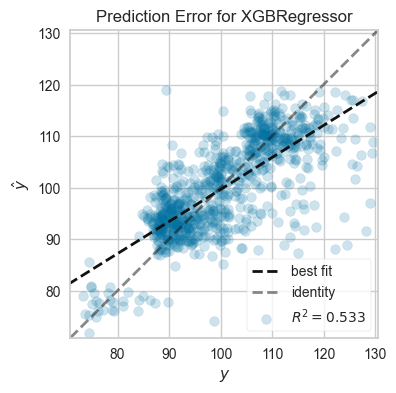

In [49]:
################################################################################################################################
# plot the Prediction Error graph
################################################################################################################################

try:
    plt.figure(figsize=(4,4))
    print("\n                           Prediction Error Plot")
    prediction_error(XGBR, MBxtrainFull, MBytrain, MBxtestFull,  MBytest,alpha=.2)
    #plt.legend(bbox_to_anchor=(0.95, 0.54, 0.5, 0.5))
    plt.show()
except:
    AttributeError
    


                                                  Residuals Plot


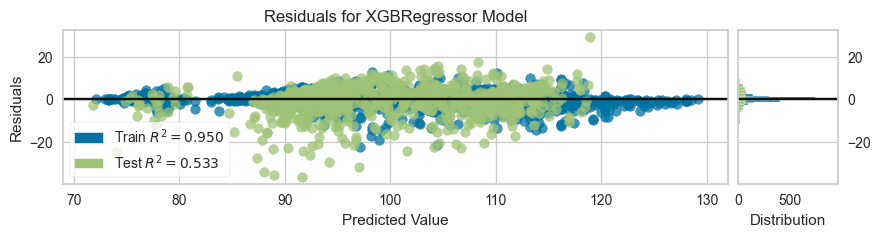

In [50]:
################################################################################################################################
# plot the Residuals graph
################################################################################################################################

try:
    plt.figure(figsize=(10,2))
    print("\n                                                  Residuals Plot")
    print(residuals_plot(XGBR, MBxtrainFull, MBytrain, MBxtestFull,  MBytest,alpha=.5))
except:
    AttributeError
    

In [51]:
################################################################################################################################
# apply cross validation and compare the accuracy score with xgboost
################################################################################################################################

scores = cross_val_score(XGBR, MBxtrainFull, MBytrain, cv=2)
print("Mean cross-validation score: %.2f" % scores.mean())


Mean cross-validation score: 0.52


In [52]:
################################################################################################################################
# apply kfold cross validation and compare the accuracy score with xgboost
################################################################################################################################

kfold = KFold(n_splits=2, shuffle=True)
kf_cv_scores = cross_val_score(XGBR, MBxtrainFull, MBytrain, cv=kfold )
print("Mean K-fold cross-validation score: %.2f" % kf_cv_scores.mean())


Mean K-fold cross-validation score: 0.52


In [53]:
printmd('Prediction on the whole Test dataset')

## <span style="color:red">Prediction on the whole Test dataset</span>

In [54]:
################################################################################################################################
# read the input test dataset
################################################################################################################################

MBdata_test = pd.read_csv('./datasets/MBtest.csv')


In [55]:
################################################################################################################################
# check how many rows and columns are there in test dataset
################################################################################################################################

MBdata_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), object(8)
memory usage: 12.1+ MB


In [56]:
################################################################################################################################
# check the statistics on the test dataset
################################################################################################################################

MBdata_test.describe()


ID          X10          X11          X12          X13  \
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000   
mean   4211.039202     0.019007     0.000238     0.074364     0.061060   
std    2423.078926     0.136565     0.015414     0.262394     0.239468   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%    2115.000000     0.000000     0.000000     0.000000     0.000000   
50%    4202.000000     0.000000     0.000000     0.000000     0.000000   
75%    6310.000000     0.000000     0.000000     0.000000     0.000000   
max    8416.000000     1.000000     1.000000     1.000000     1.000000   

               X14          X15          X16          X17          X18  ...  \
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000  ...   
mean      0.427893     0.000713     0.002613     0.008791     0.010216  ...   
std       0.494832     0.026691     0.051061     0.093357     0.100570  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
50%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%       1.000000     0.000000     0.000000     0.000000     0.000000  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

              X375         X376         X377         X378         X379  \
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000   
mean      0.325968     0.049656     0.311951     0.019244     0.011879   
std       0.468791     0.217258     0.463345     0.137399     0.108356   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     0.000000     1.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

              X380         X382         X383         X384         X385  
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000  
mean      0.008078     0.008791     0.000475     0.000713     0.001663  
std       0.089524     0.093357     0.021796     0.026691     0.040752  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 369 columns]

In [57]:
################################################################################################################################
# check for null values in test dataset
################################################################################################################################

for i in MBdata_test.columns:
    if (MBdata_test[i].isna().sum() != 0):
        print('column ', i ,' null-values-test-dataset: ', MBdata_test[i].isna().sum())
        

In [58]:
################################################################################################################################
# drop the variables which we droped from the train dataset which had 0 variance
################################################################################################################################

MBdata_test = MBdata_test.drop(['X11','X93','X107','X204','X205','X233','X235',
                                'X236','X268','X289','X290','X293','X297','X330',
                                'X339','X347'],axis=1)


In [59]:
################################################################################################################################
# variables with 1 unique or 0 varaiance values in test dataset
################################################################################################################################

for i in MBdata_test.columns: 
    if (MBdata_test[i].nunique()== 1):
        print('column ', i ,' unique-values-test-dataset: ', MBdata_test[i].nunique())
 

column  X257  unique-values-test-dataset:  1
column  X258  unique-values-test-dataset:  1
column  X295  unique-values-test-dataset:  1
column  X296  unique-values-test-dataset:  1
column  X369  unique-values-test-dataset:  1


In [60]:
################################################################################################################################
# variables with more than 2 unique values in test dataset
################################################################################################################################

for i in MBdata_test.columns: 
    if (MBdata_test[i].nunique() > 2):
        print('column ', i ,' unique-values-test-dataset: ', MBdata_test[i].nunique())
 

column  ID  unique-values-test-dataset:  4209
column  X0  unique-values-test-dataset:  49
column  X1  unique-values-test-dataset:  27
column  X2  unique-values-test-dataset:  45
column  X3  unique-values-test-dataset:  7
column  X4  unique-values-test-dataset:  4
column  X5  unique-values-test-dataset:  32
column  X6  unique-values-test-dataset:  12
column  X8  unique-values-test-dataset:  25


In [61]:
################################################################################################################################
# select object type columns for label encoding from test dataset
################################################################################################################################

for i in MBdata_test.columns:
     if MBdata_test[i].dtype ==  object :
        print('column ', i ,' object-datatype-test-dataset: ', MBdata_test[i].dtype)
        

column  X0  object-datatype-test-dataset:  object
column  X1  object-datatype-test-dataset:  object
column  X2  object-datatype-test-dataset:  object
column  X3  object-datatype-test-dataset:  object
column  X4  object-datatype-test-dataset:  object
column  X5  object-datatype-test-dataset:  object
column  X6  object-datatype-test-dataset:  object
column  X8  object-datatype-test-dataset:  object


In [62]:
################################################################################################################################
# we need to remove the ID column from test dataset as it is not relevant. 
################################################################################################################################

MBdata_test = MBdata_test.drop(['ID'],axis=1)

print(MBdata_test.shape)


(4209, 360)


In [63]:
################################################################################################################################
# seperate the categorical and numerical variables from original test dataset 
################################################################################################################################

MBdata_testNum = MBdata_test.drop(['X0','X1','X2','X3','X4','X5','X6','X8'],axis=1)
MBdata_testCat = MBdata_test[['X0','X1','X2','X3','X4','X5','X6','X8']]


In [64]:
################################################################################################################################
# prepare date for Label encoding by populating new labels with one of the existing
# labels
################################################################################################################################

i = 0
while i < MBdata_testCat.shape[0]:
    
    if MBdata_testCat.X0.iat[i] not in X0_UNIQUE:
        MBdata_testCat.X0.iat[i] = X0_UNIQUE[0]
    
    if MBdata_testCat.X1.iat[i] not in X1_UNIQUE:
        MBdata_testCat.X1.iat[i] = X1_UNIQUE[0]
    
    if MBdata_testCat.X2.iat[i] not in X2_UNIQUE:
        MBdata_testCat.X2.iat[i] = X2_UNIQUE[0]
    
    if MBdata_testCat.X3.iat[i] not in X3_UNIQUE:
        MBdata_testCat.X3.iat[i] = X3_UNIQUE[0]
    
    if MBdata_testCat.X4.iat[i] not in X4_UNIQUE:
        MBdata_testCat.X4.iat[i] = X4_UNIQUE[0]
    
    if MBdata_testCat.X5.iat[i] not in X5_UNIQUE:
        MBdata_testCat.X5.iat[i] = X5_UNIQUE[0]
    
    if MBdata_testCat.X6.iat[i] not in X6_UNIQUE:
        MBdata_testCat.X6.iat[i] = X6_UNIQUE[0]
    
    if MBdata_testCat.X8.iat[i] not in X8_UNIQUE:
        MBdata_testCat.X8.iat[i] = X8_UNIQUE[0]
    
    i = i+1
    

In [65]:
################################################################################################################################
# Label encoding for original test dataset (transform only no fitting)
################################################################################################################################

MBdata_testCat.X0 =  X0le.transform(MBdata_testCat.X0)
MBdata_testCat.X1 =  X1le.transform(MBdata_testCat.X1)
MBdata_testCat.X2 =  X2le.transform(MBdata_testCat.X2)
MBdata_testCat.X3 =  X3le.transform(MBdata_testCat.X3)
MBdata_testCat.X4 =  X4le.transform(MBdata_testCat.X4)
MBdata_testCat.X5 =  X5le.transform(MBdata_testCat.X5)
MBdata_testCat.X6 =  X6le.transform(MBdata_testCat.X6)
MBdata_testCat.X8 =  X8le.transform(MBdata_testCat.X8)


In [66]:
################################################################################################################################
# Scale the Numerical test data using Standard scalar (transform only)
################################################################################################################################

MBTestNum_scaled_data = scaler.transform(MBdata_testNum)


In [67]:
################################################################################################################################
# now run the PCA on the scaled numerical part of test data as we did on the train
# (transform only)
################################################################################################################################

MBTestNum_pca = pca.transform(MBTestNum_scaled_data)


In [68]:
################################################################################################################################
# variables reduced from 368 columns to 128 components
################################################################################################################################

MBTestNum_pca.shape


(4209, 127)

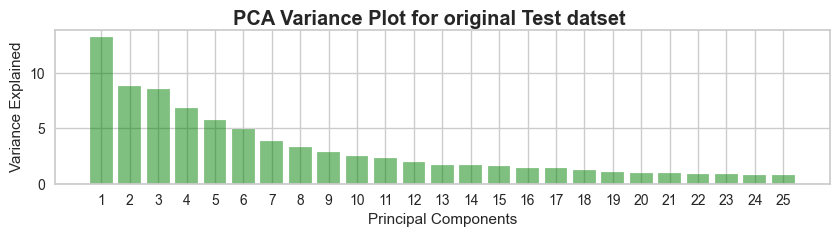

In [69]:
################################################################################################################################
# plot the principal component variance on original test dataset
################################################################################################################################

plt.figure(figsize=(10,2.0))
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['1', '2', '3', '4','5','6','7','8','9','10',
           '11', '12', '13', '14','15','16','17','18','19','20',
           '21', '22', '23', '24','25']
plt.bar(x= range(1,26), height=percent_variance[0:25],alpha=.5, tick_label=columns,color='green')
plt.ylabel('Variance Explained')
plt.xlabel('Principal Components')
plt.suptitle('PCA Variance Plot for original Test datset',fontweight='bold')
plt.show()


In [70]:
################################################################################################################################
# concatenate the categorical and numerical parts of the original test dataset
################################################################################################################################

MBTestFull = np.concatenate((MBdata_testCat,MBTestNum_pca),axis=1)


In [71]:
################################################################################################################################
# Validate on the original test dataset
################################################################################################################################

MBY_Pred = XGBR.predict(MBTestFull)


In [72]:
MBTestFull.shape

(4209, 135)

In [73]:
################################################################################################################################
# physically look at the first 10 predicted values
################################################################################################################################
MBY_Pred = np.round(MBY_Pred,2)
pd.DataFrame({'Predicted values of original Test dataset' : MBY_Pred}).head(10)


Predicted values of original Test dataset
0                                  75.599998
1                                  99.760002
2                                  77.669998
3                                  78.059998
4                                 108.120003
5                                  93.339996
6                                 111.790001
7                                  96.779999
8                                 115.739998
9                                  86.570000

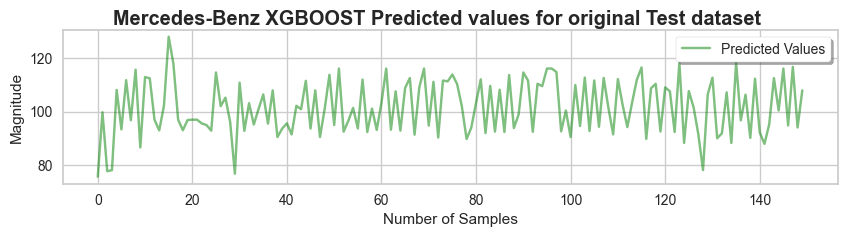

In [74]:
################################################################################################################################
# plot the graph of the pridicted values of the original test dataset
################################################################################################################################

plt.figure(figsize=(10,2.0))
ax = range(len(MBY_Pred[:150]))
plt.plot(ax, MBY_Pred[:150], label="Predicted Values",color='green',alpha=.5)
plt.suptitle("Mercedes-Benz XGBOOST Predicted values for original Test dataset",fontweight='bold')
plt.xlabel('Number of Samples')
plt.ylabel('Magnitude')
plt.legend(frameon=True,shadow=True)
plt.show()



             Prediction Error Plot for the whole Train dataset(before split)


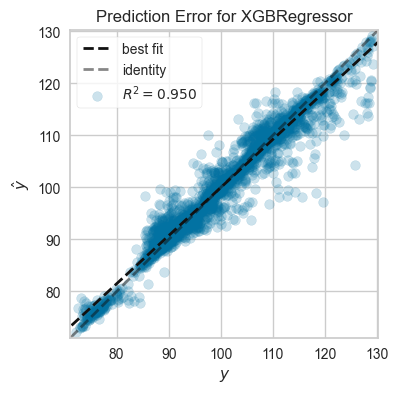

In [75]:
################################################################################################################################
# plot the Prediction Error graph for the whole test dataset
################################################################################################################################

try:
    plt.figure(figsize=(4,4))
    print("\n             Prediction Error Plot for the whole Train dataset(before split)")
    prediction_error(XGBR, MBxtrainFull, MBytrain ,alpha=.2)
    plt.show()
except:
    AttributeError


                              Residuals Plot for the whole Train dataset(before split)


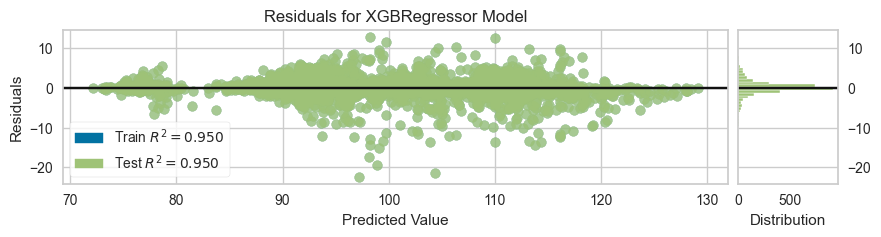

In [76]:
################################################################################################################################
# plot the Residuals graph for the whole test dataset
################################################################################################################################
residuals_plot
try:
    plt.figure(figsize=(10,2.0))
    print("\n                              Residuals Plot for the whole Train dataset(before split)")
    print(residuals_plot(XGBR, MBxtrainFull, MBytrain,alpha=.2, X_test=None,y_test=None,train_alpha=0.25,
    test_alpha=0.75))
except:
    AttributeError

In [77]:
################################################################################################################################
# Print the parameters used for the XGBOOST
################################################################################################################################
print(XGBR)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0.4, reg_lambda=0.6, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=1)


In [78]:
printmd('Compare the accuracy of XGBoost with Ridge Lasso and ElasticNet')

## <span style="color:red">Compare the accuracy of XGBoost with Ridge Lasso and ElasticNet</span>

In [79]:
################################################################################################################################
# Now test the datasets with Ridge, Lasso and ElasticNet models
################################################################################################################################

from sklearn.linear_model import Ridge, Lasso, ElasticNet


In [80]:
################################################################################################################################
# Instantiate the Ridge, Lasso and ElasticNet models
################################################################################################################################

RR = Ridge(alpha=.90,solver='lsqr')
LR = Lasso(alpha=.9)
ER = ElasticNet(l1_ratio=.9)


In [81]:
################################################################################################################################
# Fit the Ridge, Lasso and ElasticNet models using Train datsets
################################################################################################################################

RR.fit(MBxtrainFull,MBytrain), LR.fit(MBxtrainFull, MBytrain ), ER.fit(MBxtrainFull, MBytrain )


(Ridge(alpha=0.9, solver='lsqr'), Lasso(alpha=0.9), ElasticNet(l1_ratio=0.9))

In [82]:
################################################################################################################################
# Check the Rsquared score for Ridge, Lasso and ElasticNet models
################################################################################################################################

print('Rsquared value for Ridge is      : %.2f' % RR.score(MBxtrainFull, MBytrain)) 
print('Rsquared value for Lasso is      : %.2f' % LR.score(MBxtrainFull, MBytrain)) 
print('Rsquared value for ElasticNet is : %.2f' % ER.score(MBxtrainFull, MBytrain))


Rsquared value for Ridge is      : 0.68
Rsquared value for Lasso is      : 0.54
Rsquared value for ElasticNet is : 0.51


In [233]:
printmd('Ridge performed better than XGBoost; got R squared of .68 compared to .53')

## <span style="color:red">Ridge performed better than XGBoost; got R squared of .68 compared to .53</span>

In [84]:
################################################################################################################################
# Predict the Ridge, Lasso and ElasticNet models using the test datasets
################################################################################################################################

Rpred=RR.predict(MBxtestFull)
Lpred=LR.predict(MBxtestFull)
Epred=ER.predict(MBxtestFull)


In [85]:
################################################################################################################################
# Check the root mean squared value for Ridge model
################################################################################################################################

rmseR = np.sqrt(mean_squared_error(MBytest,Rpred))
print('Root mean squared error value for Ridge  is %.2f' % rmseR )


Root mean squared error value for Ridge  is 6.51


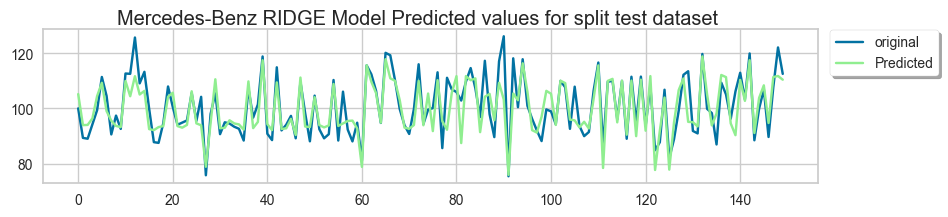

In [86]:
################################################################################################################################
# plot the graph of the pridicted values of the test dataset using Ridge model
################################################################################################################################

plt.figure(figsize=(10,2))
ax = range(len(Rpred[:150]))
plt.plot(ax, MBytest[:150], label="original")
plt.plot(ax, Rpred[:150], label="Predicted",color='lightgreen')
plt.suptitle("Mercedes-Benz RIDGE Model Predicted values for split test dataset")
plt.legend(frameon=True,shadow=True,bbox_to_anchor=(0.665, 0.54, 0.5, 0.5))
plt.show()


In [87]:
################################################################################################################################
# Check the root mean squared value for Lasso model
################################################################################################################################

rmseL = np.sqrt(mean_squared_error(MBytest,Lpred))
print('Root mean squared error value for Lasso is %.2f' % rmseL )


Root mean squared error value for Lasso is 7.56


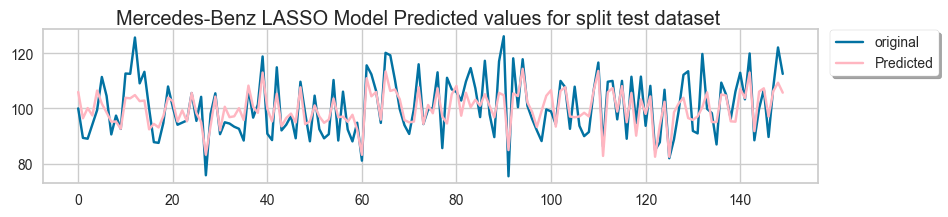

In [88]:
################################################################################################################################
# plot the graph of the pridicted values of the test dataset using LASSO model
################################################################################################################################

plt.figure(figsize=(10,2))
ax = range(len(Lpred[:150]))
plt.plot(ax, MBytest[:150], label="original")
plt.plot(ax, Lpred[:150], label="Predicted",color='lightpink')
plt.suptitle("Mercedes-Benz LASSO Model Predicted values for split test dataset")
plt.legend(frameon=True,shadow=True,bbox_to_anchor=(0.665, 0.54, 0.5, 0.5))
plt.show()


In [89]:
################################################################################################################################
# Check the root mean squared value for ElasticNet model
################################################################################################################################

rmseE = np.sqrt(mean_squared_error(MBytest,Epred))
print('Root mean squared error value for ElasticNet is %.2f' % rmseE )


Root mean squared error value for ElasticNet is 7.72


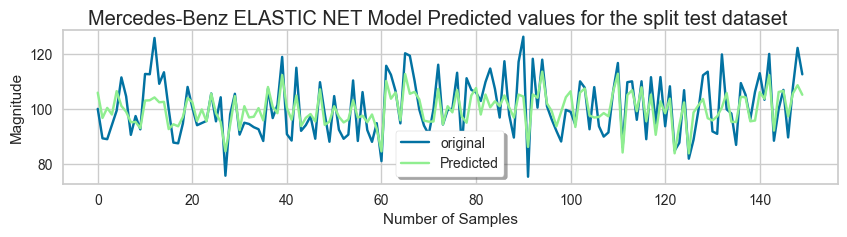

In [91]:
################################################################################################################################
# plot the graph of the pridicted values of the test dataset using ElasticNet model
################################################################################################################################

plt.figure(figsize=(10,2))
ax = range(len(Epred[0:150]))
plt.plot(ax, MBytest[0:150], label="original")
plt.plot(ax, Epred[0:150], label="Predicted",color='lightgreen')
plt.xlabel('Number of Samples')
plt.ylabel('Magnitude')
plt.suptitle("Mercedes-Benz ELASTIC NET Model Predicted values for the split test dataset")
plt.legend(frameon=True,shadow=True)
plt.show()


In [93]:
printmd('There is no variation in data.')
printmd('16 variables with 0 varaince and 340 out of 360 features binary; \
as a result none of the models performed well.')

## <span style="color:red">There is no variation in data.</span>

## <span style="color:red">16 variables with 0 varaince and 340 out of 360 features binary; as a result none of the models performed well.</span>

In [94]:
printmd('Let me try with Neural Network')

## <span style="color:red">Let me try with Neural Network</span>

In [95]:
################################################################################################################################
# import the libraries for deep learning model building
################################################################################################################################
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model 
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import ModelCheckpoint , ReduceLROnPlateau
from tensorflow.keras.layers import Dropout, Input
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization 
import tqdm 
import tensorflow_addons as tfa
tqdm_callback = tfa.callbacks.TQDMProgressBar()
import time


In [96]:
################################################################################################################################
# build the deep learnig model and compile for health care data analysis 
################################################################################################################################
def Create_model():
    model = Sequential()
    model.add(Input(shape=(135,)))

    model.add(Dense(1024, activation=tf.nn.relu, kernel_regularizer = tf.keras.regularizers.l2(0.000001)))  
    model.add(BatchNormalization())
    model.add(Dropout(.4))

    model.add(Dense(256, activation=tf.nn.relu, kernel_regularizer = tf.keras.regularizers.l2(0.000001))) 
    model.add(Dropout(.4))
    model.add(BatchNormalization())



    model.add(Dense(32, activation=tf.nn.relu, kernel_regularizer = tf.keras.regularizers.l1(0.000001))) 
    model.add(Dropout(.4))
    model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dense(1, activation=tf.nn.relu))

    opt = Adam(lr=0.02,beta_1=0.5)  

    model.compile(loss='mse', optimizer=opt, metrics=['mse'])
    return model

In [97]:
model = Create_model()

In [172]:
################################################################################################################################
# define the path for the trained model from local directory and also define the checkpoints on val_loss
################################################################################################################################

FILEPATH="./Weights/weights_Mercedes_Benz_Dense1024_NEW2.hdf5"
RLROP_PAT = 5
DECAY_DROP = 0.95
Reduce_lr_on_plat=ReduceLROnPlateau(monitor='val_loss',mode='min',patience=RLROP_PAT,factor=DECAY_DROP,\
                                    min_lr=1e-29,verbose=2)


checkpoint = ModelCheckpoint(FILEPATH, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callback_list = [tqdm_callback, checkpoint, Reduce_lr_on_plat] #, 

In [220]:
################################################################################################################################
# load the trained model
################################################################################################################################
FILEPATH="./Weights/weights_Mercedes_Benz_Dense1024_NEW.hdf5"
#model.load_weights('./Weights/weights_Mercedes_Benz_Dense1024LOSS40.216.hdf5')
model = load_model(FILEPATH)


opt = Adam(lr=3e-5,beta_1=0.9)


#model.load_weights(FILEPATH)

model.compile(loss='mse', optimizer=opt, metrics=[ 'mse'])



In [218]:
################################################################################################################################
# print the summary of the loaded module
################################################################################################################################
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              139264    
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               262400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                8

In [219]:
################################################################################################################################
# fit the built model and run it for 1500 epochs
################################################################################################################################
history = model.fit(MBxtrainFull,MBytrain, validation_data=(MBxtestFull,MBytest), callbacks=callback_list,    
                    batch_size=33, epochs=50, verbose=0)    

Training:   0%|                                                                                0/50 ETA: ?s,  …

Epoch 1/50


0/101                                                                                                        E…


Epoch 00001: val_loss did not improve from 40.97291
Epoch 2/50


0/101                                                                                                        E…


Epoch 00002: val_loss did not improve from 40.97291
Epoch 3/50


0/101                                                                                                        E…


Epoch 00003: val_loss did not improve from 40.97291
Epoch 4/50


0/101                                                                                                        E…


Epoch 00004: val_loss did not improve from 40.97291
Epoch 5/50


0/101                                                                                                        E…


Epoch 00005: val_loss did not improve from 40.97291
Epoch 6/50


0/101                                                                                                        E…


Epoch 00006: val_loss did not improve from 40.97291

Epoch 00006: ReduceLROnPlateau reducing learning rate to 2.849999928002944e-05.
Epoch 7/50


0/101                                                                                                        E…


Epoch 00007: val_loss did not improve from 40.97291
Epoch 8/50


0/101                                                                                                        E…


Epoch 00008: val_loss did not improve from 40.97291
Epoch 9/50


0/101                                                                                                        E…


Epoch 00009: val_loss did not improve from 40.97291
Epoch 10/50


0/101                                                                                                        E…


Epoch 00010: val_loss did not improve from 40.97291
Epoch 11/50


0/101                                                                                                        E…


Epoch 00011: val_loss did not improve from 40.97291

Epoch 00011: ReduceLROnPlateau reducing learning rate to 2.707499879761599e-05.
Epoch 12/50


0/101                                                                                                        E…


Epoch 00012: val_loss did not improve from 40.97291
Epoch 13/50


0/101                                                                                                        E…


Epoch 00013: val_loss did not improve from 40.97291
Epoch 14/50


0/101                                                                                                        E…


Epoch 00014: val_loss did not improve from 40.97291
Epoch 15/50


0/101                                                                                                        E…


Epoch 00015: val_loss did not improve from 40.97291
Epoch 16/50


0/101                                                                                                        E…


Epoch 00016: val_loss did not improve from 40.97291

Epoch 00016: ReduceLROnPlateau reducing learning rate to 2.572124885773519e-05.
Epoch 17/50


0/101                                                                                                        E…


Epoch 00017: val_loss did not improve from 40.97291
Epoch 18/50


0/101                                                                                                        E…


Epoch 00018: val_loss did not improve from 40.97291
Epoch 19/50


0/101                                                                                                        E…


Epoch 00019: val_loss did not improve from 40.97291
Epoch 20/50


0/101                                                                                                        E…


Epoch 00020: val_loss did not improve from 40.97291
Epoch 21/50


0/101                                                                                                        E…


Epoch 00021: val_loss did not improve from 40.97291

Epoch 00021: ReduceLROnPlateau reducing learning rate to 2.4435186242044436e-05.
Epoch 22/50


0/101                                                                                                        E…


Epoch 00022: val_loss did not improve from 40.97291
Epoch 23/50


0/101                                                                                                        E…


Epoch 00023: val_loss did not improve from 40.97291
Epoch 24/50


0/101                                                                                                        E…


Epoch 00024: val_loss did not improve from 40.97291
Epoch 25/50


0/101                                                                                                        E…


Epoch 00025: val_loss did not improve from 40.97291
Epoch 26/50


0/101                                                                                                        E…


Epoch 00026: val_loss did not improve from 40.97291

Epoch 00026: ReduceLROnPlateau reducing learning rate to 2.3213427448354194e-05.
Epoch 27/50


0/101                                                                                                        E…


Epoch 00027: val_loss did not improve from 40.97291
Epoch 28/50


0/101                                                                                                        E…


Epoch 00028: val_loss did not improve from 40.97291
Epoch 29/50


0/101                                                                                                        E…


Epoch 00029: val_loss did not improve from 40.97291
Epoch 30/50


0/101                                                                                                        E…


Epoch 00030: val_loss did not improve from 40.97291
Epoch 31/50


0/101                                                                                                        E…


Epoch 00031: val_loss did not improve from 40.97291

Epoch 00031: ReduceLROnPlateau reducing learning rate to 2.2052756594348463e-05.
Epoch 32/50


0/101                                                                                                        E…


Epoch 00032: val_loss did not improve from 40.97291
Epoch 33/50


0/101                                                                                                        E…


Epoch 00033: val_loss did not improve from 40.97291
Epoch 34/50


0/101                                                                                                        E…


Epoch 00034: val_loss did not improve from 40.97291
Epoch 35/50


0/101                                                                                                        E…


Epoch 00035: val_loss did not improve from 40.97291
Epoch 36/50


0/101                                                                                                        E…


Epoch 00036: val_loss did not improve from 40.97291

Epoch 00036: ReduceLROnPlateau reducing learning rate to 2.095011850542505e-05.
Epoch 37/50


0/101                                                                                                        E…


Epoch 00037: val_loss did not improve from 40.97291
Epoch 38/50


0/101                                                                                                        E…


Epoch 00038: val_loss did not improve from 40.97291
Epoch 39/50


0/101                                                                                                        E…


Epoch 00039: val_loss did not improve from 40.97291
Epoch 40/50


0/101                                                                                                        E…


Epoch 00040: val_loss did not improve from 40.97291
Epoch 41/50


0/101                                                                                                        E…


Epoch 00041: val_loss did not improve from 40.97291

Epoch 00041: ReduceLROnPlateau reducing learning rate to 1.9902611802535828e-05.
Epoch 42/50


0/101                                                                                                        E…


Epoch 00042: val_loss did not improve from 40.97291
Epoch 43/50


0/101                                                                                                        E…


Epoch 00043: val_loss did not improve from 40.97291
Epoch 44/50


0/101                                                                                                        E…


Epoch 00044: val_loss did not improve from 40.97291
Epoch 45/50


0/101                                                                                                        E…


Epoch 00045: val_loss did not improve from 40.97291
Epoch 46/50


0/101                                                                                                        E…


Epoch 00046: val_loss did not improve from 40.97291

Epoch 00046: ReduceLROnPlateau reducing learning rate to 1.890748199002701e-05.
Epoch 47/50


0/101                                                                                                        E…


Epoch 00047: val_loss did not improve from 40.97291
Epoch 48/50


0/101                                                                                                        E…


Epoch 00048: val_loss did not improve from 40.97291
Epoch 49/50


0/101                                                                                                        E…


Epoch 00049: val_loss did not improve from 40.97291
Epoch 50/50


0/101                                                                                                        E…


Epoch 00050: val_loss did not improve from 40.97291


In [221]:
################################################################################################################################
# extract the variables for accuracy and loss reporting
################################################################################################################################
train_loss, train_acc = model.evaluate(MBxtrainFull,MBytrain, verbose=0,callbacks=[tqdm_callback])
test_loss, test_acc = model.evaluate(MBxtestFull,MBytest, verbose=0,callbacks=[tqdm_callback])
print('Train Accu: %.3f, Test Accu: %.3f' % (train_acc, test_acc))
print('Train Loss: %.3f, Test Loss: %.3f' % (train_loss, test_loss))



0/104                                                                                              ETA: ?s - E…

0/26                                                                                               ETA: ?s - E…

Train Accu: 36.589, Test Accu: 40.794
Train Loss: 36.721, Test Loss: 40.926


In [222]:
################################################################################################################################
# pridict on the split test dataset to calculate different error values
################################################################################################################################

y_Pred = model.predict(MBxtestFull)

In [223]:
################################################################################################################################
# calcualate the r squared values for split test dataset
################################################################################################################################

R_squared = r2_score(MBytest, y_Pred)
print("DNN R-Squared: ", np.round(R_squared, 8))


DNN R-Squared:  0.65211351


In [235]:
printmd('Neural Network performance is almost same as that of Ridge; got R Squared of .65 compared to .68')

## <span style="color:red">Neural Network performance is almost same as that of Ridge; got R Squared of .65 compared to .68</span>

In [225]:
################################################################################################################################
# pysically compare the true and predicted file shapes are ok
################################################################################################################################
y_Pred.shape,MBytest.shape

((826, 1), (826,))

In [226]:
y_Pred= y_Pred.reshape(826,)

In [227]:
################################################################################################################################
# pysically compare the true and predicted first 10 values
################################################################################################################################

pd.DataFrame({'Actual values ': MBytest, 'Predicted values ': y_Pred}).head(10)


Actual values   Predicted values 
2788          100.02         104.149200
3420           89.34          93.804001
3188           89.03          94.203667
1449           94.26          96.002007
2820           99.40         104.051750
1544          111.42         110.952278
279           104.56          97.522041
3354           90.60          93.896782
229            97.42          94.175880
2019           92.60          93.785156

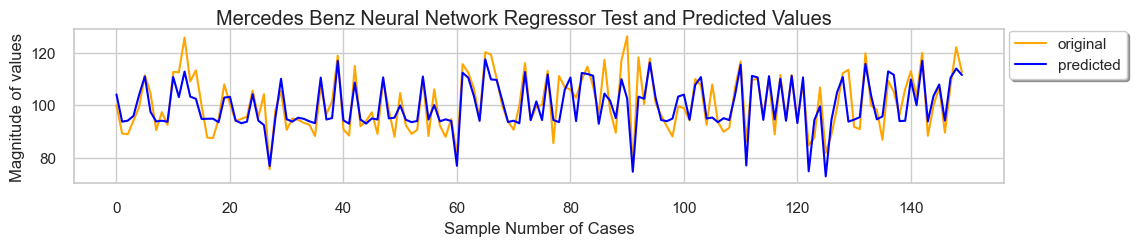

In [228]:
################################################################################################################################
# plot the graph of true and predicted values
################################################################################################################################
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
plt.figure(figsize=(12,2))
ax = range(len(MBytest[0:150]))
plt.plot(ax, MBytest[0:150], color='orange',label="original")
plt.plot(ax, y_Pred[0:150], color='blue',label="predicted")
plt.suptitle("Mercedes Benz Neural Network Regressor Test and Predicted Values")
plt.xlabel('Sample Number of Cases')
plt.ylabel('Magnitude of values')
plt.legend(bbox_to_anchor=(0.64, .54, 0.5, 0.5),frameon=True,shadow=True)
plt.show()


In [229]:
printmd("Neural Network Model too couldn't perform well with this data, got R Squared value of just .65")
printmd('One of the reasons could be 370 features out of 380 total features in file are binary or 0 variance.')
printmd('As there is no varaition in data, none of the models performed well.') 
printmd('Tree based models could do well for such data I believe.')

## <span style="color:red">Neural Network Model too couldn't perform well with this data, got R Squared value of just .65</span>

## <span style="color:red">One of the reasons could be 370 features out of 380 total features in file are binary or 0 variance.</span>

## <span style="color:red">As there is no varaition in data, none of the models performed well.</span>

## <span style="color:red">Tree based models could do well for such data I believe.</span>